# Pregunta 1: Análisis de un Modelo Autorregresivo

Este notebook define un modelo autorregresivo (AR), calcula su Función de Impulso-Respuesta (IRF) y compara los resultados de dos métodos de cálculo.

### 1. Configuración del Entorno

Esta celda asegura que el notebook se ejecute desde la carpeta principal del proyecto. Esto es importante para que las rutas a otros archivos funcionen correctamente.

In [1]:
from util import go_to_project_root
go_to_project_root()

CWD cambiado a la raíz del proyecto: /home/epsilon/Documents/doctorado/S2/ENSTA630/tareas/HW2


### 2. Carga de Herramientas

Aquí se importan las librerías y funciones necesarias para el análisis. 
La última línea (`%autoreload 2`) es una utilidad que recarga automáticamente el código cuando se hacen cambios en los archivos fuente.

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

from source.models.ar import AutoRegressive 
from source.display.hw.hw1 import plot_irf_comparison, save_figure

%load_ext autoreload
%autoreload 2

### 3. Definición del Modelo Autorregresivo (AR)

En esta celda se crea el modelo AR. Puedes **modificar los coeficientes** en la lista `fixed_phi` para experimentar con diferentes modelos. Luego, se imprime un resumen con las propiedades del modelo creado.

In [3]:
fixed_phi = [0.5, -0.2, 0.5, 0.1]

ar_model = AutoRegressive(params_distribution=fixed_phi)
print(ar_model)

               AR(4) Model Summary                
Model Order              : 4
Intercept (c)            : 0.0
Error Std Dev (sigma)    : 1.0
Is Stationary            : True
Mu (Unc. Mean):          : 0.0
Sigma (Unc. Std.)        : 1.74
--------------------------------------------------
Coefficients (phi):
  phi_1    =  0.50
  phi_2    = -0.20
  phi_3    =  0.50
  phi_4    =  0.10


### 4. Cálculo de la Función de Impulso-Respuesta (IRF)

Esta celda calcula la IRF del modelo. Puedes **ajustar el horizonte** del análisis cambiando el valor de la variable `H`. Se calculan dos versiones de la IRF para compararlas.

In [4]:
H = 20
irf_exact = ar_model.get_irf(H=H, method='exact')
irf_simulation = ar_model.get_irf(H=H, method='simulation')

/home/epsilon/Documents/doctorado/S2/ENSTA630/tareas/HW2/source/statistics/impulse_response.py:41: ComplexWarning: Casting complex values to real discards the imaginary part
  irf_values[h] = temp[0, 0]


### 5. Visualización de Resultados

Finalmente, esta celda genera un gráfico que compara las dos IRFs calculadas y lo guarda como un archivo PDF en la carpeta `./presentation/figures/p1/`.

✅ Figura guardada exitosamente en ./presentation/figures/p1/simvsexact.pdf


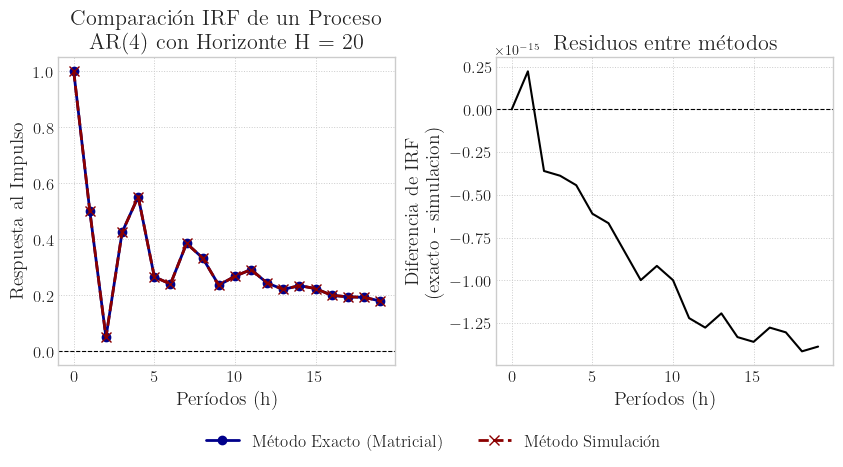

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'wspace':0.3})
axes = plot_irf_comparison(irf_exact, irf_simulation, model=ar_model, ax=axes)
save_figure(fig, path='./presentation/figures/p1/simvsexact.pdf')